# Exercise 1. Getting & Knowing Your Data/Chipotle

In [3]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
#  What is the number of observations in the dataset?
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
# What is the number of columns in the dataset?
print(chipo.shape[1])
#Print the name of all the columns
print(chipo.columns)

5
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [17]:
# How is the dataset indexed?
print(chipo.index)
#Which was the most-ordered item? For the most-ordered item, how many items were ordered?
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
print('The most ordered item and quantity :',c.head(1))

RangeIndex(start=0, stop=4622, step=1)
The most ordered item and quantity :               order_id  quantity
item_name                       
Chicken Bowl    713926       761


In [18]:
# What was the most ordered item in the choice_description column?
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [20]:
# How many items were orderd in total?
total_items_orders = chipo.quantity.sum()
print('total number of items = ',total_items_orders)

total number of items =  4972


In [21]:
# Turn the item price into a float
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.item_price.dtype

dtype('float64')

In [22]:
#How much was the revenue for the period in the dataset?
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [23]:
# Number of orders
orders = chipo.order_id.value_counts().count()
orders

1834

In [27]:
# What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price'] #Total Rev
order_grouped = chipo.groupby(by=['order_id']).sum() #Number of items
print(order_grouped.mean()['revenue']) #Average item 

#Could be also replaced with
print(revenue/orders)

21.394231188658654
21.39423118865867


In [28]:
# How many different items are sold?
chipo.item_name.value_counts().count()

50

# Exercise 2. Filtering & Sorting Fictional Army

In [29]:
import pandas as pd

In [30]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [31]:
#  Create a dataframe and assign it to a variable called army.
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


In [32]:
army.set_index('origin', inplace=True) #Set the 'origin' colum as the index of the dataframe

In [35]:
print(army.veterans) #priting the column veterans
print(army[["veterans", "deaths"]])#printing both

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64
            veterans  deaths
origin                      
Arizona            1     523
California         5      52
Texas             62      25
Florida           26     616
Maine             73      43
Iowa              37     234
Alaska           949     523
Washington        48      62
Oregon            48      62
Wyoming          435      73
Louisana          63      37
Georgia          345      35


In [37]:
army.columns#Print the name of all the columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

In [38]:
# Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska
army.loc[["Maine", "Alaska"], ["deaths", "size", "deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


In [39]:
army.iloc[2:7, 2:6] #Select specific number of rows and columns-rows 3 to 7 and the columns 3 to 6

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


In [44]:
#  Select every row after the fourth row and all columns
print('Table 1')
print(army.iloc[4:, :])
#Select every row up to the 4th row and all columns
print()
print('Table 2')
print(army.iloc[:4, :])
#Select the 3rd column up to the 7th column
print()
print('Table 3')
print(army.iloc[:, 2:7])

Table 1
            regiment company  deaths  battles  size  veterans  readiness  \
origin                                                                     
Maine       Dragoons     1st      43        4  1592        73          2   
Iowa        Dragoons     1st     234        7  1006        37          1   
Alaska      Dragoons     2nd     523        8   987       949          2   
Washington  Dragoons     2nd      62        3   849        48          3   
Oregon        Scouts     1st      62        4   973        48          2   
Wyoming       Scouts     1st      73        7  1005       435          1   
Louisana      Scouts     2nd      37        8  1099        63          2   
Georgia       Scouts     2nd      35        9  1523       345          3   

            armored  deserters  
origin                          
Maine             0          3  
Iowa              1          4  
Alaska            0         24  
Washington        1         31  
Oregon            0          2  


In [46]:
#Select rows where df.deaths is greater than 50
print('Table 1')
print(army[army['deaths']>50])
#Select rows where df.deaths is greater than 500 or less than 50
print()
print('Table 2')
print(army[(army["deaths"] > 500) | (army["deaths"] < 50)])

Table 1
              regiment company  deaths  battles  size  veterans  readiness  \
origin                                                                       
Arizona     Nighthawks     1st     523        5  1045         1          1   
California  Nighthawks     1st      52       42   957         5          2   
Florida     Nighthawks     2nd     616        2  1400        26          3   
Iowa          Dragoons     1st     234        7  1006        37          1   
Alaska        Dragoons     2nd     523        8   987       949          2   
Washington    Dragoons     2nd      62        3   849        48          3   
Oregon          Scouts     1st      62        4   973        48          2   
Wyoming         Scouts     1st      73        7  1005       435          1   

            armored  deserters  
origin                          
Arizona           1          4  
California        0         24  
Florida           1          2  
Iowa              1          4  
Alaska       

In [49]:
#  Select all the regiments not named "Dragoons"
army[army["regiment"] != "Dragoons"]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [50]:
#Select the rows called Texas and Arizona
army.loc[["Texas", "Arizona"], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4


In [51]:
#Select the third cell in the row named Arizona
army.loc[["Arizona"]].iloc[:, 2]

origin
Arizona    523
Name: deaths, dtype: int64

In [52]:
#Select the third cell down in the column named deaths
army.loc[:, ["deaths"]].iloc[2]

deaths    25
Name: Texas, dtype: int64

# Exercise 3. Grouping/Alchohol consumption

In [53]:
import pandas as pd
import numpy as np
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(link)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [55]:
# Which continent drinks more beer on average?
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [58]:
#  For each continent print the statistics for wine consumption.
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [59]:
# Print the mean alcohol consumption per continent for every column
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [60]:
# Print the median alcohol consumption per continent for every column
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [61]:
# Print the mean, min and max values for spirit consumption.
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


# Exercise 4. Apply/US_Crime_Rate

In [108]:
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [109]:
# What is the type of the columns?

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [110]:
# Convert the type of the column Year to datetime64
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [111]:
# Set the Year column as the index of the dataframe
crime = crime.set_index('Year', drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [112]:
# Delete the Total column
del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [102]:
# Group the year by decades and sum the values
# Sum each decade
crimes = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max()

# Updating the "Population" column
crimes['Population'] = population

crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [113]:
# What is the most dangerous decade to live in the US?
crime.idxmax(0)

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

# Exercise 5. Merge/Housing Market

In [114]:
import pandas as pd
import numpy as np

In [115]:
#  Create 3 differents Series, each of length 100, as follows:

# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     2
1     2
2     1
3     2
4     4
     ..
95    4
96    2
97    3
98    3
99    2
Length: 100, dtype: int64 0     2
1     2
2     1
3     1
4     2
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64 0     23087
1     11862
2     12330
3     25683
4     11609
      ...  
95    26509
96    24365
97    11071
98    28990
99    12422
Length: 100, dtype: int64


In [116]:
# Create a DataFrame by joinning the Series by column
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,2,2,23087
1,2,2,11862
2,1,1,12330
3,2,1,25683
4,4,2,11609


In [117]:
# Change the name of the columns to bedrs, bathrs, price_sqr_meter
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,23087
1,2,2,11862
2,1,1,12330
3,2,1,25683
4,4,2,11609


In [122]:
# Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# join concat the values
bigcolumn = pd.concat([s1, s2, s3], axis=0)

# Transform it to a DataFrame
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

print(bigcolumn)
print(len(bigcolumn)) #to confirm our work

<class 'pandas.core.frame.DataFrame'>
        0
0       2
1       2
2       1
3       2
4       4
..    ...
95  26509
96  24365
97  11071
98  28990
99  12422

[300 rows x 1 columns]
300


In [123]:
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,2
1,2
2,1
3,2
4,4
...,...
295,26509
296,24365
297,11071
298,28990


# Exercise 6. Status/Wind_Stats

In [130]:
import pandas as pd
import datetime

In [139]:
# Import the dataset from the below address and assign it to a variable called data and replace the first 3 columns by a proper datetime index
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [140]:
# Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yr_Mo_Dy  6574 non-null   object 
 1   RPT       6568 non-null   float64
 2   VAL       6571 non-null   float64
 3   ROS       6572 non-null   float64
 4   KIL       6569 non-null   float64
 5   SHA       6572 non-null   float64
 6   BIR       6574 non-null   float64
 7   DUB       6571 non-null   float64
 8   CLA       6572 non-null   float64
 9   MUL       6571 non-null   float64
 10  CLO       6573 non-null   float64
 11  BEL       6574 non-null   float64
 12  MAL       6570 non-null   float64
dtypes: float64(12), object(1)
memory usage: 667.8+ KB
None
     Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  1961-01-

In [141]:
# Set the right dates as the index.
# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

print(data.head())
print(data.info())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Yr_Mo_Dy                                                                   
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Yr_Mo_Dy                         
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   f

In [142]:
# Compute how many values are missing for each location over the entire record.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [143]:
# Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [144]:
# Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [145]:
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [147]:
# Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [148]:
# Find the average windspeed in January for each location.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [149]:
#Downsample the record to a yearly frequency for each location.
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [150]:
# Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [151]:
# Downsample the record to a weekly frequency for each location
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [152]:
# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Exercise 7. Visualization/Chipotle

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [163]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


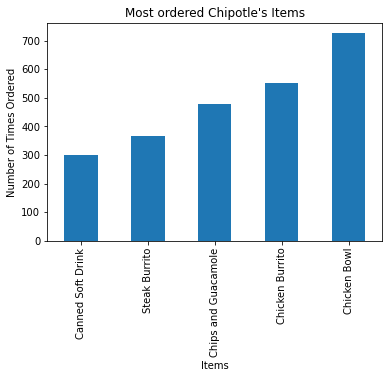

In [164]:
# Create a histogram of the top 5 items bought
# Series of items
x = chipo.item_name

# set a Counter
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

(0.0, 36.7)

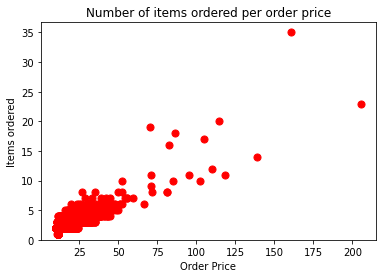

In [165]:
# Create a scatterplot with the number of items orderered per order price
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'red')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

# Exercise 8. Creating Series and Data Frames/Pokemon

In [166]:
import pandas as pd
#insert data
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [167]:
#Assing it to a a varibale called pokemon
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [171]:
#Rearragne
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [173]:
#Add another column called place, and insert what you have in mind.
pokemon['place'] = ['park','street','lake','forest']
pokemon = pokemon[['name', 'type', 'hp', 'place','evolution','pokedex']]
pokemon

,name,type,hp,place,evolution,pokedex
0,Bulbasaur,grass,45,park,Ivysaur,yes
1,Charmander,fire,39,street,Charmeleon,no
2,Squirtle,water,44,lake,Wartortle,yes
3,Caterpie,bug,45,forest,Metapod,no


In [175]:
# Present the type of each column
pokemon.dtypes

name         object
type         object
hp            int64
place        object
evolution    object
pokedex      object
dtype: object

# Exercise 9. Time Series/Apple Stock

In [176]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [177]:
# Pull in the data
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [182]:
# Check out the type of the columns
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [183]:
# Transform the Date column as a datetime type
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [184]:
# Set the date as the index
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [185]:
#Check for duplicates
apple.index.is_unique

True

In [186]:
#Rearrange
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [187]:
#  Get the last business day of each month
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [188]:
# What is the difference in days between the first day and the oldest
(apple.index.max() - apple.index.min()).days

12261

In [192]:
# How many months in the data we have?
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

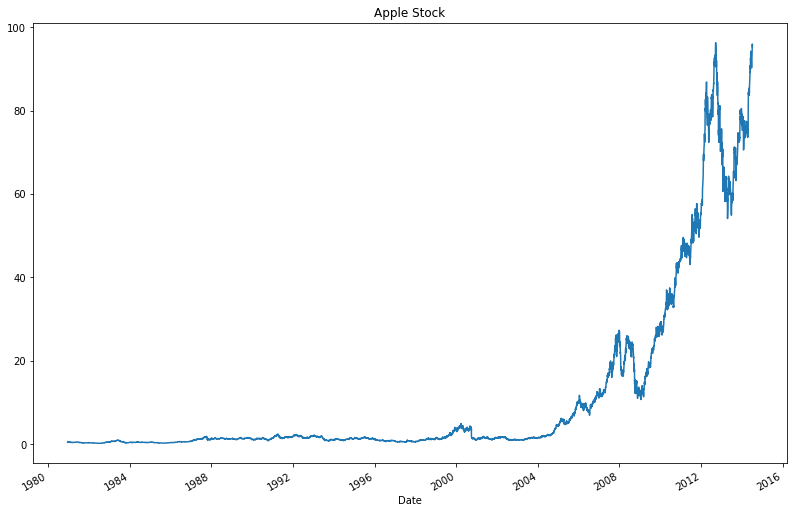

In [193]:
# Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

# Exercise 10. Deleting/Wine

In [195]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [196]:
# Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [197]:
# Assign the columns as below:

# The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):
# 1) alcohol
# 2) malic_acid
# 3) alcalinity_of_ash
# 4) magnesium
# 5) flavanoids
# 6) proanthocyanins
# 7) hue
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [198]:
# Set the values of the first 3 rows from alcohol as NaN
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [199]:
# Now set the value of the rows 3 and 4 of magnesium as NaN
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


In [200]:
# Fill the value of NaN with the number 10 in alcohol and 100 in magnesium
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


In [201]:
#  Count the number of missing values
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [202]:
# Create an array of 10 random numbers up until 10
random = np.random.randint(10, size = 10)
random

array([0, 7, 3, 0, 2, 3, 5, 1, 0, 8])

In [203]:
# Use random numbers you generated as an index and assign NaN value to each of cell.
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,NaN,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75
5,NaN,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,NaN,1.35,16.0,98.0,3.15,1.85,7.22
9,14.10,2.16,18.0,105.0,3.32,2.38,5.75


In [204]:
#  How many missing values do we have?
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [205]:
# Delete the rows that contain missing values
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
9,14.10,2.16,18.0,105.0,3.32,2.38,5.75
10,14.12,1.48,16.8,95.0,2.43,1.57,5.00
11,13.75,1.73,16.0,89.0,2.76,1.81,5.60


In [206]:
#  Print only the non-null values in alcohol
mask = wine.alcohol.notnull()
mask

4      True
6      True
9      True
10     True
11     True
       ... 
172    True
173    True
174    True
175    True
176    True
Name: alcohol, Length: 170, dtype: bool

In [207]:
wine.alcohol[mask]

4      14.20
6      14.06
9      14.10
10     14.12
11     13.75
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 170, dtype: float64

In [208]:
# Reset the index, so it starts with 0 again
wine = wine.reset_index(drop = True)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.20,1.76,15.2,112.0,3.39,1.97,6.75
1,14.06,2.15,17.6,121.0,2.51,1.25,5.05
2,14.10,2.16,18.0,105.0,3.32,2.38,5.75
3,14.12,1.48,16.8,95.0,2.43,1.57,5.00
4,13.75,1.73,16.0,89.0,2.76,1.81,5.60
